In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.io as sio

In [2]:
data_path = "ex4data1.mat"
data = sio.loadmat(data_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [3]:
X = data['X']
y = data['y']
m = y.shape[0]
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


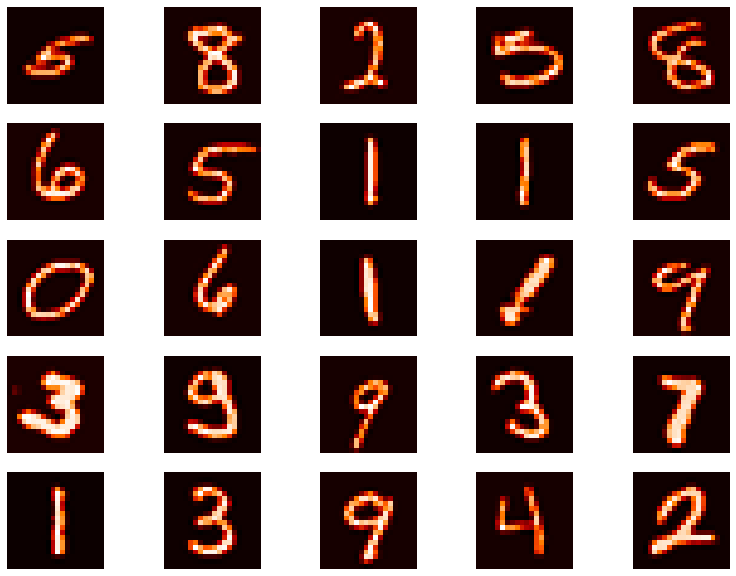

In [4]:
def display_data(data, width):
    plt.figure(figsize=(15,8))
    plt.subplots_adjust(top=1.1, right=0.8, left=0.1)
    snum = np.sqrt(data.shape[0])
    for i, im_data in enumerate(data):
        plt.subplot(snum, snum, i+1)
        plt.axis('off')
        image = data[i].reshape((20, 20), order='F') #order like in fortran, nice
        plt.imshow(image,'gist_heat')
      
    plt.show()

#np.random.seed(42)
rand_indices = np.random.randint(5000, size=25)
display_data(X[rand_indices], 20)

In [5]:
weights_path = "ex4weights.mat"
weights = sio.loadmat(weights_path)
print(weights.keys())
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(theta1.shape, theta2.shape)
print(X.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
(25, 401) (10, 26)
(5000, 400)


In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

sigmoid(np.array([[0, 1, 2],[0, -1, -2]]))

array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

In [7]:
def predict(X, theta1, theta2):
    m = X.shape[0]
    X = np.hstack((np.ones([m,1]), X))
    z_2 = X @ theta1.T
    h_2 = sigmoid(z_2)
    h_2 = np.hstack((np.ones([m,1]), h_2))
    z_3 = h_2 @ theta2.T
    h_3 = sigmoid(z_3)
    pred = np.argmax(h_3, axis=1) + 1
    
    return pred

In [8]:
pred = predict(X, theta1, theta2)

In [9]:
print("acc: ", np.count_nonzero(pred == y[:,0])/m)

acc:  0.9752


In [10]:
def sigmoid_gradient(z):
    return sigmoid(z)*(1 - sigmoid(z))


In [11]:
def nn_cost_function(nn_params, 
                     input_layer_size, 
                     hidden_layer_size, 
                     num_labels, 
                     X, y, lamb=0.0):
    
    theta1 = np.reshape(nn_params[:(hidden_layer_size * (input_layer_size + 1))],
                        [hidden_layer_size, input_layer_size + 1])
    theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        [num_labels, hidden_layer_size + 1])
    
    theta1_grad = np.zeros(theta1.shape)
    theta2_grad = np.zeros(theta2.shape)
    
    grad = 0
    
    m = X.shape[0]
    J = 0
    for i in range(m):
        a_1 = np.hstack(([1], X[i]))[None,:]
        #print(a_1.shape)
        z_2 = a_1 @ theta1.T
        #print(theta1.T.shape)
        a_2 = sigmoid(z_2)
        a_2 = np.hstack(([[1]], a_2))
        #print(a_2.shape)
        z_3 = a_2 @ theta2.T
        #print(theta2.T.shape)
        a_3 = sigmoid(z_3)
        #print(a_3.shape)
        #print(a_3)
        for k in range(1, num_labels+1):
            J += (-int(y[i] == k)) * np.log(a_3[0][k-1]) - (int(y[i]!= k)) * np.log(1-a_3[0][k-1]) 
        z_2 = np.hstack(([[1]], z_2))
        d_3 = a_3
        #print(d_3.shape)
        d_3[0][y[i]-1] = d_3[0][y[i]-1] - 1
        d_2 = (d_3 @ theta2) * sigmoid_gradient(z_2)
        d_2 = d_2[0][None, 1:]
        #print(d_2.shape, a_1.shape)
        theta1_grad = theta1_grad + d_2.T @ a_1
        #print(theta1_grad.shape)
        theta2_grad = theta2_grad + d_3.T @ a_2
    t1 = theta1[:,1:]
    t2 = theta2[:,1:]
    J = (1/m) * J
    J_reg = (lamb/(2*m))*(np.sum(t1**2) + np.sum(t2**2))
    J = J + J_reg
    
    theta1_grad = (1/m) * theta1_grad
    theta2_grad = (1/m) * theta2_grad

    theta1_grad[:,1:] = theta1_grad[:,1:] + (lamb/m)*theta1[:,1:]
    theta2_grad[:,1:] = theta2_grad[:,1:] + (lamb/m)*theta2[:,1:]

    #grad = np.array([theta1_grad, theta2_grad])
    grad = np.concatenate([theta1_grad.ravel(), theta2_grad.ravel()])
    
    return [J, grad]

In [13]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

# Unroll parameters 
nn_params = np.r_[theta1.flatten(), theta2.flatten()]

# Weight regularization parameter (we set this to 0 here).
lamb = 0

J, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)
print("Results with weights loaded from ex4weights")
print('Cost at parameters, expected - 0.287629:', J)
#print("theta1_grad shape: ", grad[0].shape)
#print("theta2_grad shape: ", grad[1].shape)
J, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)
print('Cost with lambda = 1, expected - 0.383770:', J)
J, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 3)
print('Cost with lambda = 3, expected - 0.576051: ', J)

Results with weights loaded from ex4weights
Cost at parameters, expected - 0.287629: 0.2876291651613203
Cost with lambda = 1, expected - 0.383770: 0.38376985909092504
Cost with lambda = 3, expected - 0.576051:  0.5760512469501344


In [14]:
def rand_weights(size_in, size_out):
    epsilon = 0.12
    return np.random.rand(size_out, size_in + 1) * 2*epsilon - epsilon

In [15]:
my_theta1 = rand_weights(input_layer_size, hidden_layer_size)
my_theta2 = rand_weights(hidden_layer_size, num_labels)
print(my_theta1.shape, my_theta2.shape)

(25, 401) (10, 26)


In [16]:
def compute_numerical_gradient(J, theta, e=1e-4):
    numgrad = np.zeros(theta.shape)
    perturb = np.diag(e * np.ones(theta.shape))
    for i in range(theta.size):
        loss1, _ = J(theta - perturb[:, i])
        loss2, _ = J(theta + perturb[:, i])
        numgrad[i] = (loss2 - loss1)/(2*e)
    return np.array(numgrad)

In [17]:
def check_gradient(nn_cost_function, lamb=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

    # We generate some 'random' test data
    theta1 = rand_weights(input_layer_size, hidden_layer_size) # [5x4]
    theta2 = rand_weights(hidden_layer_size, num_labels) # [3x6]

    X = 1 * np.random.random((m, input_layer_size)) + 1 # [3, 3]
    y = np.random.randint(1, num_labels+1, size=(m+1, 1)) # [1, 6]
    nn_params = np.r_[theta1.flatten(), theta2.flatten()]

    # short hand for cost function
    cost_func = lambda p: nn_cost_function(p, input_layer_size, hidden_layer_size,
                                        num_labels, X, y, lamb)
    cost, all_grads = cost_func(nn_params)
    numgrad = compute_numerical_gradient(cost_func, nn_params)
    #all_grads = np.hstack((grad[0].flatten(), grad[1].flatten()))
    # Visually examine the two gradient computations.The two columns you get should be very similar.
    
    print(np.stack([numgrad, all_grads], axis=1))
    print('The above two columns you get should be very similar.')
    print('(Left-Your Numerical Gradient, Right-Analytical Gradient)\n')

    # Evaluate the norm of the difference between two the solutions. If you have a correct
    # implementation, and assuming you used e = 0.0001 in computeNumericalGradient, then diff
    # should be less than 1e-9.
    diff = np.linalg.norm(numgrad - all_grads)/np.linalg.norm(numgrad + all_grads)

    print('If your backpropagation implementation is correct, then \n'
          'the relative difference will be small (less than 1e-9). \n'
          'Relative Difference: %g' % diff)

In [18]:
check_gradient(nn_cost_function)

[[ 0.00925857  0.00925857]
 [ 0.01497526  0.01497526]
 [ 0.01259588  0.01259588]
 [ 0.01385237  0.01385237]
 [-0.01193265 -0.01193265]
 [-0.01942332 -0.01942332]
 [-0.01749429 -0.01749429]
 [-0.02063995 -0.02063995]
 [ 0.00511645  0.00511645]
 [ 0.00825598  0.00825598]
 [ 0.00671333  0.00671333]
 [ 0.00711127  0.00711127]
 [ 0.0056085   0.0056085 ]
 [ 0.00906768  0.00906768]
 [ 0.00759801  0.00759801]
 [ 0.00831105  0.00831105]
 [-0.01686064 -0.01686064]
 [-0.0274349  -0.0274349 ]
 [-0.02461985 -0.02461985]
 [-0.02895612 -0.02895612]
 [ 0.50812023  0.50812023]
 [ 0.29948861  0.29948861]
 [ 0.26009175  0.26009175]
 [ 0.30233835  0.30233835]
 [ 0.2501349   0.2501349 ]
 [ 0.23956151  0.23956151]
 [-0.06280713 -0.06280713]
 [-0.03871774 -0.03871774]
 [-0.03175499 -0.03175499]
 [-0.03965023 -0.03965023]
 [-0.03038933 -0.03038933]
 [-0.02851312 -0.02851312]
 [ 0.07708135  0.07708135]
 [ 0.04712694  0.04712694]
 [ 0.03906166  0.03906166]
 [ 0.04813734  0.04813734]
 [ 0.03741865  0.03741865]
 

In [19]:
from scipy import optimize

options= {'maxiter': 100}
nn_params = np.r_[theta1.flatten(), theta2.flatten()]
lamb = 1

# Create "short hand" for the cost function to be minimized
cost_func = lambda p: nn_cost_function(p, input_layer_size, hidden_layer_size,
                                        num_labels, X, y, lamb)
# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(cost_func,
                        nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

In [20]:
res_params = res.x
res_params.shape

(10285,)

In [21]:
theta1_res = np.reshape(res_params[:(hidden_layer_size * (input_layer_size + 1))],
                        [hidden_layer_size, input_layer_size + 1])
theta2_res = np.reshape(res_params[(hidden_layer_size * (input_layer_size + 1)):],
                        [num_labels, hidden_layer_size + 1])

pred = predict(X, theta1_res, theta2_res)
print("acc: ", np.count_nonzero(pred == y[:,0])/m)

acc:  0.9942


In [22]:
diff = np.linalg.norm(theta1_res - theta1)/np.linalg.norm(theta1_res + theta1)
diff

0.22995501557144873

In [23]:
def displayData(X, example_width=None, figsize=(10, 10)):
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='gist_heat', extent=[0, 1, 0, 1])
        ax.axis('off')

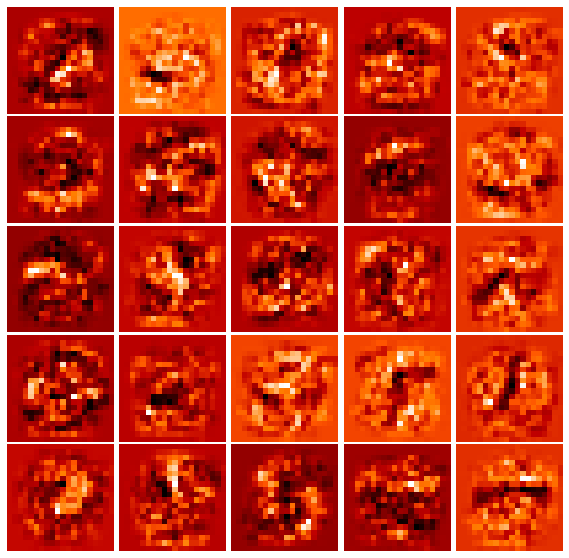

In [24]:
displayData(theta1_res[:, 1:])